The Objetive of the NMF is Find two non-negative matrices (W, H) whose product approximates the non-negative matrix X.
This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

# Using Scikit-learn
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [1]:
import numpy as np
from sklearn.decomposition import NMF

Defining the model

In [15]:
K = 3
model = NMF(n_components=K,init='nndsvdar',solver='mu') 
model

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvdar', l1_ratio=0.0,
  max_iter=200, n_components=3, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0)

A test Array

In [16]:
Original = [
    [5,3,0,1],
    [4,0,0,1],
    [1,1,0,0],
    [1,0,0,1],
    [0,1,5,0]
]
Original = np.array(Original)

In [17]:
W = model.fit_transform(Original)
H = model.components_

/usr/local/lib/python3.4/dist-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [18]:
print("W")
print(W)
print("H")
print(H)

W
[[  1.78496691e+000   1.27693888e-003   2.07277503e+000]
 [  1.45817386e+000   0.00000000e+000   5.66412555e-119]
 [  3.38293620e-001   4.16019471e-004   6.93587141e-001]
 [  4.25918143e-001   0.00000000e+000   2.70926024e-129]
 [  4.74021602e-006   2.25167102e+000   5.83089502e-003]]
H
[[  2.75062282e+000   1.22090230e-002   4.29515255e-302   6.54227995e-001]
 [  5.12274525e-013   4.40393638e-001   2.22057227e+000   7.71809667e-032]
 [  2.45691553e-002   1.43640107e+000   6.67755646e-042   7.26672309e-022]]


Now lets see how mush close to X are WxH and lets call it crossValue

In [19]:
crossValue = np.dot(W,H)
print("crossValue \n",crossValue)
print("rounded Values\n",np.round(crossValue))
print("Original\n",Original)

crossValue 
 [[  4.96069703e+000   2.99969133e+000   2.83553507e-003   1.16777532e+000]
 [  4.01088629e+000   1.78028782e-002   3.78225182e-160   9.53978161e-001]
 [  9.47559000e-001   1.00058276e+000   9.23801301e-004   2.21321157e-001]
 [  1.17154016e+000   5.20004441e-003   1.80912382e-170   2.78647573e-001]
 [  1.56298713e-004   9.99997153e-001   4.99999822e+000   3.10118203e-006]]
rounded Values
 [[ 5.  3.  0.  1.]
 [ 4.  0.  0.  1.]
 [ 1.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  5.  0.]]
Original
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 0]
 [1 0 0 1]
 [0 1 5 0]]


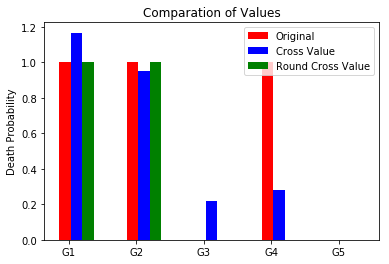

In [20]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.17       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last]), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Death Probability')
    ax.set_title('Comparation of Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('Original', 'Cross Value','Round Cross Value'))

    plt.show()

plotCompare(Original,crossValue)

In [21]:
def matrix_factorization(R, K = 2, steps=5000, alpha=0.0002, beta=0.02):
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N,K)
    Q = np.random.rand(M,K).T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q

In [22]:

nP, nQ = matrix_factorization(Original,K)

In [23]:
nP

array([[ 0.63261195,  1.39593858,  1.85233856],
       [ 1.25943276,  0.81005122,  1.26843841],
       [-0.20726658,  0.27580342,  0.63917182],
       [ 0.06841222,  0.82264097, -0.02680462],
       [ 1.80998265,  0.71006737,  0.81940248]])

In [24]:
nQ

array([[ 0.97262692, -0.26281426,  1.82127263,  0.36093037],
       [ 1.26456786,  0.96617366,  1.34203952,  0.87145778],
       [ 1.38258693,  0.97569447,  0.89570506, -0.18427333]])

In [25]:
prediction = np.dot(nP,nQ)
print(prediction)

[[ 4.94157353  2.98977612  4.68471258  1.1034938 ]
 [ 4.00304929  1.6892616   4.51703787  0.9267536 ]
 [ 1.03088969  0.94458302  0.56515957  0.04775991]
 [ 1.06976517  0.75068121  1.20460496  0.7465283 ]
 [ 3.79126137  1.0098456   4.98335328  1.12107742]]


In [26]:
np.round(prediction)

array([[ 5.,  3.,  5.,  1.],
       [ 4.,  2.,  5.,  1.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 4.,  1.,  5.,  1.]])

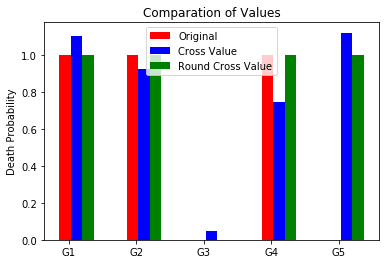

In [27]:
plotCompare(Original,prediction)